# 2 Year-2 Semester Data Science Results Analysis 

In [1]:
import pandas as pd
import numpy as np

## Import data

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,Unnamed: 0,Roll Number,Name,BEFA,Befa_Status,DM,Dm_Status,OS,Os_Status,DBMS,...,OS-Lab,DBMS-Lab,RTL-Lab,SD-Lab,ES,Total_Marks,SGPA,CGPA,Subjects_due,Section
0,0,22J41A6701,A Vinayaka Sai,84,Pass,92,Pass,90,Pass,75,...,100,97,48,98,88,854,9.35,9.31,0,A
1,1,22J41A6702,Addanki Devi Krishna,74,Pass,81,Pass,62,Pass,83,...,95,96,42,96,72,770,8.3,8.59,0,A
2,2,22J41A6703,Akshay Agarwal,83,Pass,88,Pass,70,Pass,75,...,100,98,49,98,84,820,8.7,9.03,0,A
3,3,22J41A6704,Detained,Detained,Detained,Detained,Detained,Detained,Detained,Detained,...,Detained,Detained,Detained,Detained,Detained,Detained,Detained,Detained,Detained,A
4,4,22J41A6705,Bandarupalli Harshitha,64,Pass,73,Pass,70,Pass,62,...,95,95,45,95,77,735,7.7,8.04,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,209,23J45A6717,Parimi Tharun,51,Pass,46,Pass,61,Pass,60,...,95,90,46,90,54,651,6.95,7.28,0,C
210,210,23J45A6718,Seelam Naga Krishna Reddy,53,Pass,37,Fail,61,Pass,53,...,95,87,48,89,70,651,5.95,6.13,1,C
211,211,23J45A6719,Talari Mallesh Mudhiraj,60,Pass,29,Fail,52,Pass,45,...,94,89,46,88,63,623,5.05,5.45,2,C
212,212,23J45A6720,Thogaru Sravan Kumar,71,Pass,65,Pass,67,Pass,63,...,95,91,46,87,66,718,7.7,7.8,0,C


In [4]:
df.columns

Index(['Unnamed: 0', 'Roll Number', 'Name', 'BEFA', 'Befa_Status', 'DM',
       'Dm_Status', 'OS', 'Os_Status', 'DBMS', 'Dbms_Status', 'DPA',
       'Dpa_Status', 'OS-Lab', 'DBMS-Lab', 'RTL-Lab', 'SD-Lab', 'ES',
       'Total_Marks', 'SGPA', 'CGPA', 'Subjects_due', 'Section'],
      dtype='object')

## BEFA - Business Economics and Financial Analysis
## DM - Discrete Mathematics
## OS - Operating Systems
## DBMS - Database Management Systems
## DPA - Data Preparation and Analysis
## ES - Environmental Science
## SD-Lab - Skill Development Lab

## Subject Wise Average marks

In [5]:
subject_columns = ['BEFA', 'DM', 'OS', 'DBMS', 'DPA', 'OS-Lab', 'DBMS-Lab', 'SD-Lab', 'ES']
df[subject_columns] = df[subject_columns].apply(pd.to_numeric, errors='coerce')
subject_wise_average_marks = df[subject_columns].mean()
subject_wise_average_marks

BEFA        68.605769
DM          64.947115
OS          67.451923
DBMS        64.735577
DPA         66.413462
OS-Lab      96.692308
DBMS-Lab    93.750000
SD-Lab      94.500000
ES          69.567308
dtype: float64

## Subject wise Number of Passed and Failed Students, Pass Percentage

In [6]:
status_columns = ['Befa_Status', 'Dm_Status', 'Os_Status', 'Dbms_Status', 'Dpa_Status']
subject_names = ['BEFA', 'DM', 'OS', 'DBMS', 'DPA']  
pass_counts = {}
fail_counts = {}
pass_percentages = {}
for col in status_columns:
    pass_counts[col] = df[col].value_counts().get('Pass', 0)
    fail_counts[col] = df[col].value_counts().get('Fail', 0)
    total_students = pass_counts[col] + fail_counts[col]
    pass_percentages[col] = (pass_counts[col] / total_students * 100) if total_students > 0 else 0
subject_wise_results_df = pd.DataFrame({
    'Subjects': subject_names,
    'No. of students passed': list(pass_counts.values()),
    'No. of students Failed': list(fail_counts.values()),
    'Pass Percentage': list(pass_percentages.values())
})

In [7]:
subject_wise_results = subject_wise_results_df.sort_values(by=['No. of students passed'], ascending=False)
subject_wise_new_results = subject_wise_results.reset_index(drop=True)
subject_wise_new_results

,Subjects,No. of students passed,No. of students Failed,Pass Percentage
0,DPA,199,9,95.673077
1,BEFA,198,10,95.192308
2,OS,194,14,93.269231
3,DBMS,187,21,89.903846
4,DM,175,33,84.134615


## Subject wise Number of Passed and Failed Students, Pass Percentage - Section wise

In [8]:
status_columns = ['Befa_Status', 'Dm_Status', 'Os_Status', 'Dbms_Status', 'Dpa_Status']
subject_names = ['BEFA', 'DM', 'OS', 'DBMS', 'DPA']  
sections = df['Section'].unique()  
results = []
for section in sections:
    section_data = df[df['Section'] == section] 

    for col in status_columns:
        pass_count = section_data[col].value_counts().get('Pass', 0)
        fail_count = section_data[col].value_counts().get('Fail', 0) + section_data[col].value_counts().get('Detained', 0)  

        total_students = pass_count + fail_count
        pass_percentage = (pass_count / total_students * 100) if total_students > 0 else 0
        
        results.append({
            'Section': section,
            'Subject': subject_names[status_columns.index(col)],
            'No. of students passed': pass_count,
            'No. of students Failed': fail_count,
            'Total Students': total_students,
            'Pass Percentage': pass_percentage
        })
section_wise_results_df = pd.DataFrame(results)
section_wise_results_df

,Section,Subject,No. of students passed,No. of students Failed,Total Students,Pass Percentage
0,A,BEFA,65,7,72,90.277778
1,A,DM,60,12,72,83.333333
2,A,OS,64,8,72,88.888889
3,A,DBMS,61,11,72,84.722222
4,A,DPA,63,9,72,87.500000
5,B,BEFA,64,7,71,90.140845
6,B,DM,59,12,71,83.098592
7,B,OS,66,5,71,92.957746
8,B,DBMS,63,8,71,88.732394
9,B,DPA,68,3,71,95.774648


## Section Wise Total no. of students, no. of students passed, no. of students failed and pass percentage, Fail percentage

In [9]:
sections = df['Section'].unique()  
results = []

for section in sections:
    section_data = df[df['Section'] == section]  

    pass_count = (section_data['Subjects_due'] == '0').sum() 
    fail_count = (section_data['Subjects_due'].isin(['1', '2', '3', '4', '5'])).sum()  
    detained_count = (section_data['Subjects_due'] == 'Detained').sum()  

    total_students = pass_count + fail_count + detained_count  
    pass_percentage = (pass_count / (pass_count + fail_count) * 100) if (pass_count + fail_count) > 0 else 0
    fail_percentage = (fail_count / (pass_count + fail_count) * 100) if (pass_count + fail_count) > 0 else 0
    
    results.append({
        'Section': section,
        'Total Students': total_students,
        'No. of students passed': pass_count,
        'No. of students Failed': fail_count,
        'No. of Students Detained': detained_count,
        'Pass Percentage': pass_percentage,
        'Fail Percentage' : fail_percentage
    })
Section_results_df = pd.DataFrame(results)
Section_results_df

,Section,Total Students,No. of students passed,No. of students Failed,No. of Students Detained,Pass Percentage,Fail Percentage
0,A,72,53,14,5,79.104478,20.895522
1,B,71,51,20,0,71.830986,28.169014
2,C,71,53,17,1,75.714286,24.285714


## Filtering The 10 Top Students by CGPA

In [10]:
filtered_df = df[(df['Name'] != 'Detained') & (df['CGPA'].notna())]
top_students_by_cgpa_df = filtered_df.sort_values(by='CGPA', ascending=False) 
top_10_students = top_students_by_cgpa_df[['Roll Number', 'Name', 'Total_Marks', 'SGPA', 'CGPA', 'Section']].head(10)
top_10_students

,Roll Number,Name,Total_Marks,SGPA,CGPA,Section
46,22J41A6747,Prodduturi Nikitha,863,9.35,9.51,A
190,22J41A67K1,Vedam Venkata Sarma,832,8.85,9.5,C
136,22J41A67D7,Barki Pavani,853,9.15,9.49,C
66,22J41A6767,Armoor Rishika Reddy,846,9.15,9.48,B
18,22J41A6719,Gopal Likhitha,854,9.15,9.45,A
7,22J41A6708,Bogala Aravindar Reddy,858,9.35,9.44,A
145,22J41A67E6,Gnana Teja Kummara Giri,844,8.85,9.4,C
31,22J41A6732,Mali Sreeja,870,9.35,9.39,A
0,22J41A6701,A Vinayaka Sai,854,9.35,9.31,A
156,22J41A67F7,Kavali Sreenidhi,841,9.05,9.3,C


## Filtering The 10 Top Students by SGPA

In [11]:
top_students_by_sgpa_df = filtered_df.sort_values(by='SGPA', ascending=False) 
top_10_students = top_students_by_sgpa_df[['Roll Number', 'Name', 'Total_Marks', 'SGPA', 'CGPA', 'Section']].head(10)
top_10_students

,Roll Number,Name,Total_Marks,SGPA,CGPA,Section
0,22J41A6701,A Vinayaka Sai,854,9.35,9.31,A
46,22J41A6747,Prodduturi Nikitha,863,9.35,9.51,A
7,22J41A6708,Bogala Aravindar Reddy,858,9.35,9.44,A
31,22J41A6732,Mali Sreeja,870,9.35,9.39,A
37,22J41A6738,Mitta Varshini,838,9.2,9.18,A
59,22J41A6760,Thota Pranusha,854,9.2,9.14,A
12,22J41A6713,Dundangi Govind,848,9.2,9.28,A
180,22J41A67J1,Sadiya,842,9.2,9.07,C
18,22J41A6719,Gopal Likhitha,854,9.15,9.45,A
66,22J41A6767,Armoor Rishika Reddy,846,9.15,9.48,B


## Filtering The Top 10 Students by Total Marks

In [12]:
df['Total_Marks'] = pd.to_numeric(df['Total_Marks'], errors='coerce')
top_students_by_marks_df = df.sort_values(by='Total_Marks', ascending=False) 
top_10_students_by_marks = top_students_by_marks_df[['Roll Number', 'Name', 'Total_Marks', 'SGPA', 'CGPA', 'Section']].head(10)
top_10_students_by_marks

,Roll Number,Name,Total_Marks,SGPA,CGPA,Section
31,22J41A6732,Mali Sreeja,870.0,9.35,9.39,A
46,22J41A6747,Prodduturi Nikitha,863.0,9.35,9.51,A
7,22J41A6708,Bogala Aravindar Reddy,858.0,9.35,9.44,A
0,22J41A6701,A Vinayaka Sai,854.0,9.35,9.31,A
59,22J41A6760,Thota Pranusha,854.0,9.2,9.14,A
18,22J41A6719,Gopal Likhitha,854.0,9.15,9.45,A
136,22J41A67D7,Barki Pavani,853.0,9.15,9.49,C
12,22J41A6713,Dundangi Govind,848.0,9.2,9.28,A
66,22J41A6767,Armoor Rishika Reddy,846.0,9.15,9.48,B
9,22J41A6710,Bolla Dhanalakshmi,845.0,8.85,9.23,A


## Section Wise Top 5 Students

In [13]:
df['CGPA'] = pd.to_numeric(df['CGPA'], errors='coerce')
filtered_df = df[(df['Name'] != 'Detained') & (df['CGPA'].notna())]
top_students_per_section = filtered_df.groupby('Section').apply(
    lambda x: x.nlargest(5, 'CGPA')
).reset_index(drop=True)

top_students_per_section = top_students_per_section[['Roll Number', 'Name', 'Total_Marks', 'SGPA', 'CGPA', 'Section']]
top_students_per_section

C:\Users\sriga\AppData\Local\Temp\ipykernel_6448\457987250.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_students_per_section = filtered_df.groupby('Section').apply(


,Roll Number,Name,Total_Marks,SGPA,CGPA,Section
0,22J41A6747,Prodduturi Nikitha,863.0,9.35,9.51,A
1,22J41A6719,Gopal Likhitha,854.0,9.15,9.45,A
2,22J41A6708,Bogala Aravindar Reddy,858.0,9.35,9.44,A
3,22J41A6732,Mali Sreeja,870.0,9.35,9.39,A
4,22J41A6701,A Vinayaka Sai,854.0,9.35,9.31,A
5,22J41A6767,Armoor Rishika Reddy,846.0,9.15,9.48,B
6,22J41A6783,K B Neha,827.0,8.85,9.29,B
7,22J41A6774,Bhukya Jani,830.0,8.85,9.19,B
8,22J41A67B6,Shaik Shaikshavali,820.0,8.55,9.19,B
9,22J41A6794,Mangali Manasa,826.0,8.75,9.14,B


##  Section wise Detained students

In [14]:
detained_students = df[df['Name'] == 'Detained']
detained_count_per_section = detained_students.groupby('Section').size().reset_index(name='Detained Count')

detained_count_per_section

,Section,Detained Count
0,A,5
1,C,1


## Section wise highest CGPA

In [15]:
df['CGPA'] = pd.to_numeric(df['CGPA'], errors='coerce')
highest_cgpa_per_section = df.loc[df.groupby('Section')['CGPA'].idxmax()]
cgpa_result = highest_cgpa_per_section[['Section', 'Roll Number', 'Name', 'CGPA']]

cgpa_result

,Section,Roll Number,Name,CGPA
46,A,22J41A6747,Prodduturi Nikitha,9.51
66,B,22J41A6767,Armoor Rishika Reddy,9.48
190,C,22J41A67K1,Vedam Venkata Sarma,9.50


# Visualizing the Outcomes

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

## Subject Wise Average marks

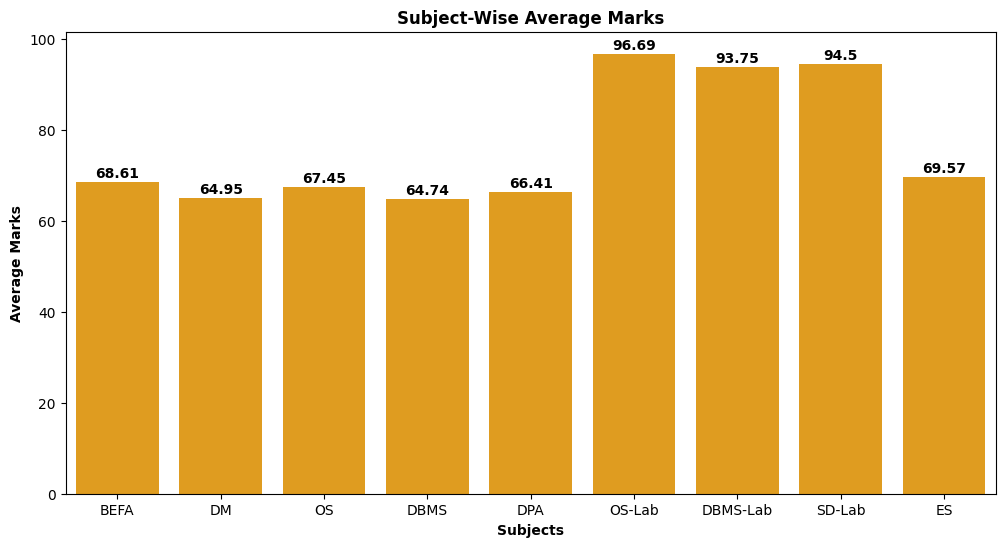

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x=subject_wise_average_marks.index, y=subject_wise_average_marks.values, color="orange")
plt.title("Subject-Wise Average Marks", fontweight='bold')
plt.xlabel("Subjects", fontweight='bold')
plt.ylabel("Average Marks", fontweight='bold') 

for i, value in enumerate(subject_wise_average_marks.values):
    plt.text(i, value + 1, round(value, 2), ha='center', color='black', fontweight='bold')

plt.show()

## Subject wise Number of Passed and Failed Students

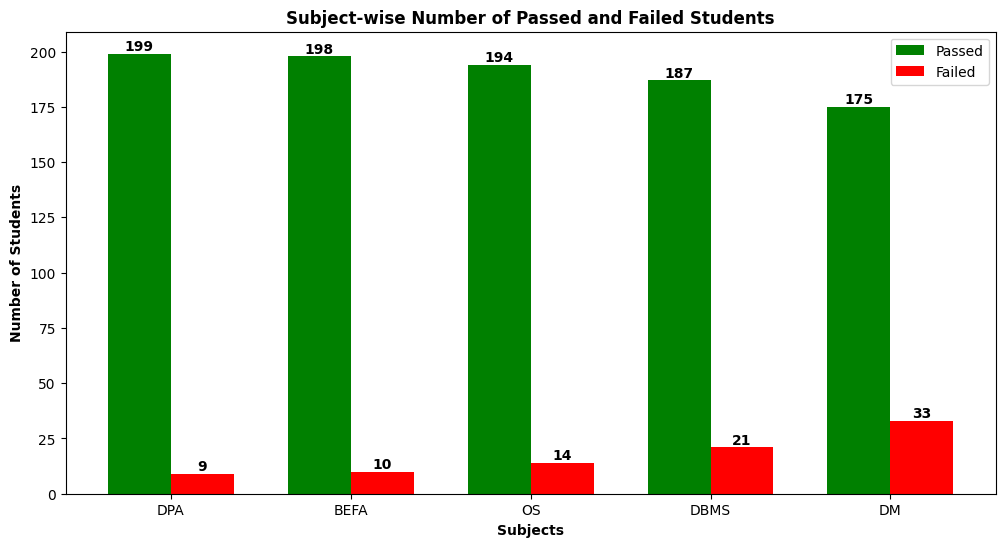

In [18]:
fig, ax = plt.subplots(figsize=(12, 6)) 
bar_width = 0.35
index = range(len(subject_names))
bars_passed = ax.bar(index, subject_wise_new_results['No. of students passed'], bar_width, label='Passed', color='green')
bars_failed = ax.bar([i + bar_width for i in index], subject_wise_new_results['No. of students Failed'], bar_width, label='Failed', color='red')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(subject_wise_new_results['Subjects'])
ax.set_ylabel('Number of Students', fontweight='bold')
ax.set_xlabel('Subjects', fontweight='bold')
ax.set_title('Subject-wise Number of Passed and Failed Students', fontweight='bold')
ax.legend()

for bar in bars_passed:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontweight='bold')  

for bar in bars_failed:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontweight='bold') 

plt.show()

## Subject wise Number of Passed and Failed Students - Section wise 

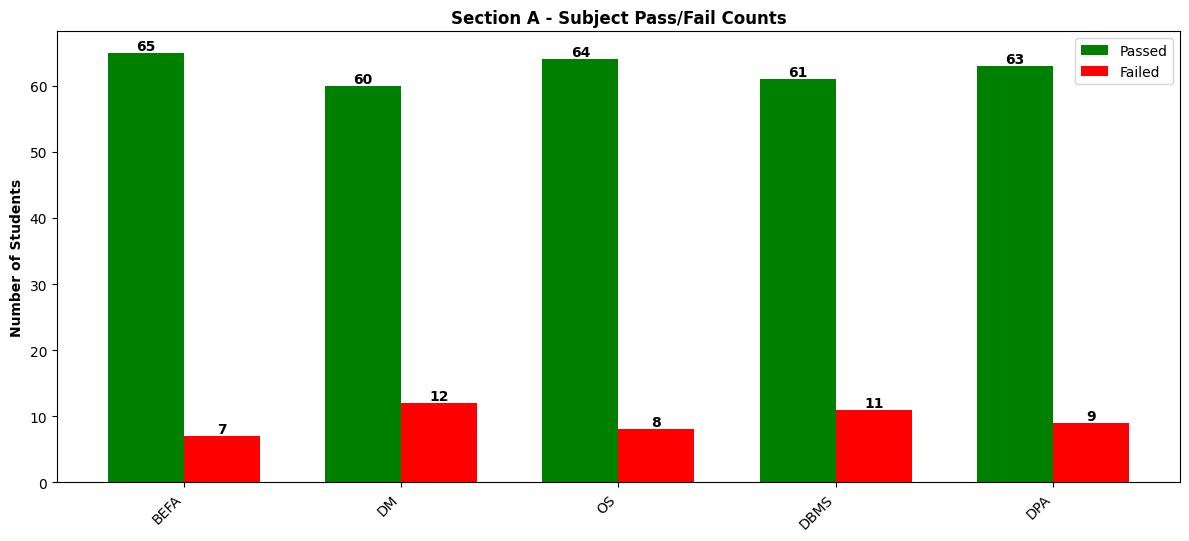

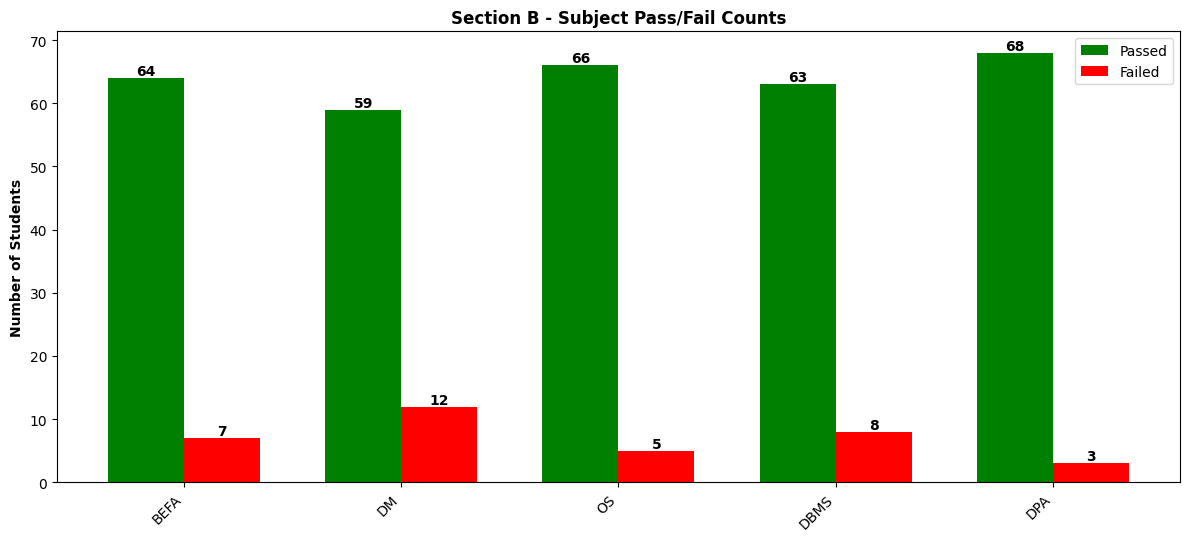

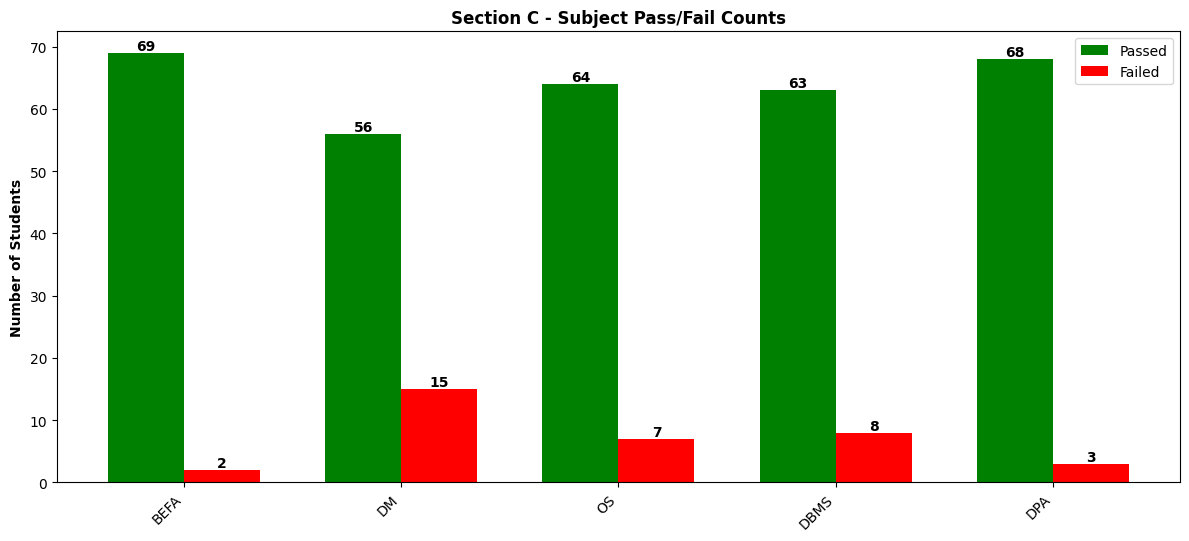

In [19]:
# status_columns = ['Befa_Status', 'Dm_Status', 'Os_Status', 'Dbms_Status', 'Dpa_Status']
subject_names = ['BEFA', 'DM', 'OS', 'DBMS', 'DPA']  
sections = df['Section'].unique()  

for section in sections:
    section_data = df[df['Section'] == section]
    results = []

    for col in status_columns:
        pass_count = section_data[col].value_counts().get('Pass', 0)
        fail_count = section_data[col].value_counts().get('Fail', 0) + section_data[col].value_counts().get('Detained', 0)  

        results.append({
            'Subject': subject_names[status_columns.index(col)],
            'No. of students passed': pass_count,
            'No. of students Failed': fail_count,
        })

    section_wise_results_df = pd.DataFrame(results)
    fig, ax = plt.subplots(figsize=(12, 6))

    width = 0.35  
    index = np.arange(len(section_wise_results_df))

    bars_passed = ax.bar(index - width/2, section_wise_results_df['No. of students passed'], width, label='Passed', color='green')
    bars_failed = ax.bar(index + width/2, section_wise_results_df['No. of students Failed'], width, label='Failed', color='red')

    ax.set_xticks(index)
    ax.set_xticklabels(section_wise_results_df['Subject'], rotation=45, ha='right')
    ax.set_ylabel('Number of Students', fontweight='bold')
    ax.set_title(f'Section {section} - Subject Pass/Fail Counts', fontweight='bold')
    ax.legend()

    for bar in bars_passed:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontweight='bold')  

    for bar in bars_failed:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontweight='bold') 

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
    plt.show()

## Subject wise Pass Percentage

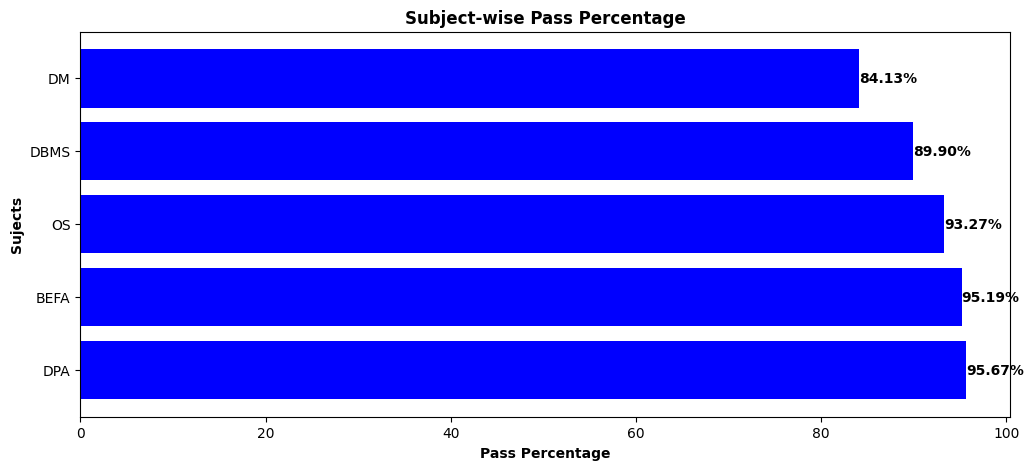

In [21]:
# Visualization
plt.figure(figsize=(12, 5))
bar_width = 0.2
bars = plt.barh(subject_wise_new_results['Subjects'], subject_wise_new_results['Pass Percentage'], color='blue')

plt.xlabel('Pass Percentage', fontweight='bold')
plt.ylabel('Sujects', fontweight='bold')
plt.title('Subject-wise Pass Percentage', fontweight='bold')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}%', ha='left', va='center', fontweight='bold')

plt.show()

## Section wise Total number of students, Total no. of passed and Total no.of failed students

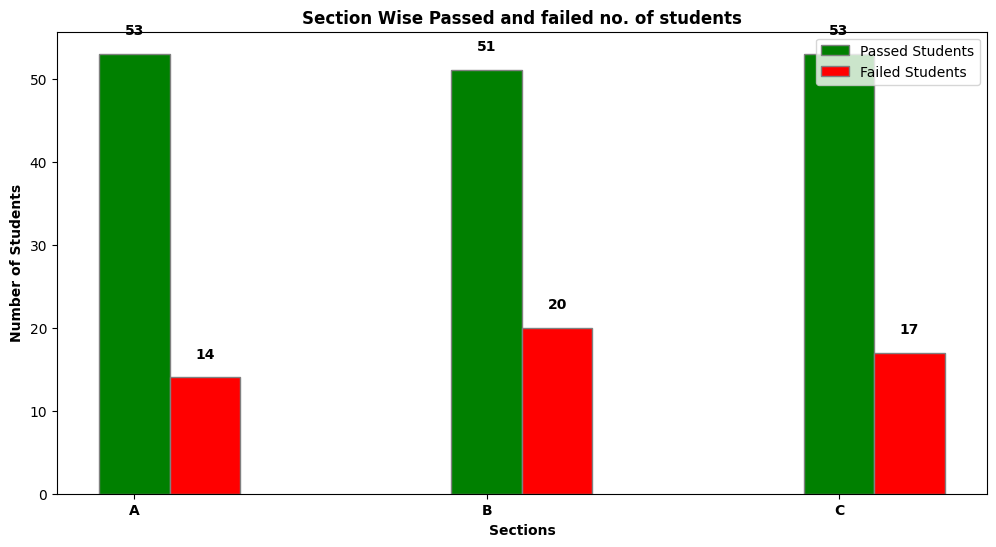

In [22]:
plt.figure(figsize=(12, 6))
bar_width = 0.2
r1 = range(len(Section_results_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r2, Section_results_df['No. of students passed'], color='green', width=bar_width, edgecolor='grey', label='Passed Students')
plt.bar(r3, Section_results_df['No. of students Failed'], color='red', width=bar_width, edgecolor='grey', label='Failed Students')

for i in range(len(Section_results_df)):
    plt.text(r2[i], Section_results_df['No. of students passed'][i] + 2, Section_results_df['No. of students passed'][i], ha='center', va='bottom', fontweight='bold')
    plt.text(r3[i], Section_results_df['No. of students Failed'][i] + 2, Section_results_df['No. of students Failed'][i], ha='center', va='bottom', fontweight='bold')

plt.xlabel('Sections', fontweight='bold')
plt.ylabel('Number of Students', fontweight='bold')
plt.title('Section Wise Passed and failed no. of students', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(Section_results_df))], Section_results_df['Section'], fontweight='bold')
plt.legend()

plt.show()

## Section-wise Pass Percentage

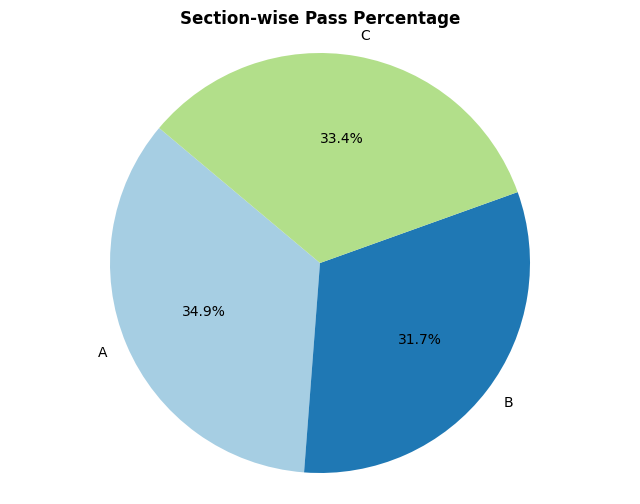

In [23]:
non_zero_pass_sections = Section_results_df[Section_results_df['Pass Percentage'] > 0]

labels = non_zero_pass_sections['Section'] 
sizes = non_zero_pass_sections['Pass Percentage']  
colors = plt.cm.Paired.colors[:len(sizes)]  

plt.figure(figsize=(8, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  
    startangle=140,
    colors=colors 
)
plt.title('Section-wise Pass Percentage', fontweight='bold')
plt.axis('equal')  

plt.show()

## Section-wise, Subject-wise Pass Percentage